In [1]:
import sys
sys.path.insert(0,'../python/')
from OpticalPhoton import *
import matplotlib.pyplot as plt

In [2]:
myPhoton = OpticalPhoton()

In [3]:
myPhoton.set_photon_position([0,0,0])
myPhoton.x0
myPhoton.current_medium
for i in range(100):
    myPhoton.generate_photon(x0=(0,0,0.01))
    xx, s, nv = myPhoton.intersection_with_cylinder(myPhoton.x0, myPhoton.t0, 2,-4,3)
    if xx:
        print('intersection',xx, ' r =',np.sqrt(xx[0]**2+xx[1]**2), 's=',s,'nv',nv)


intersection (1.8733776570213543, -0.7003257486150144, 1.2020517865435796)  r = 1.9999999999999998 s= 2.328301411287151 nv [-0.93668883  0.35016287  0.        ]
intersection (-1.9995505885789486, -0.04239627004323819, -1.4004073319904016)  r = 1.9999999999999998 s= 2.447294187900646 nv [0.99977529 0.02119814 0.        ]
intersection (-1.8638984284324456, 0.7251776668424502, 0.9036076983334774)  r = 2.0 s= 2.1905558012798614 nv [ 0.93194921 -0.36258883  0.        ]
intersection (1.6893192708648204, 1.0706074916068686, -0.5055066002000413)  r = 2.0 s= 2.065368503403159 nv [-0.84465964 -0.53530375  0.        ]
intersection (-0.8306128042159099, -1.8193631769035512, -0.944154546970325)  r = 2.0 s= 2.2159446968514684 nv [0.4153064  0.90968159 0.        ]
intersection (-0.9266893497924258, 1.7723562985419414, 0.02145557074288178)  r = 2.0 s= 2.0000328072561824 nv [ 0.46334467 -0.88617815  0.        ]
intersection (1.2033374899831253, -1.5974914350947587, -1.0638747002902567)  r = 2.0 s= 2.27

In [4]:
for i in range(10):
    myPhoton = OpticalPhoton()
    myPhoton.generate_photon(x0=(0,0,0.1))
    myPhoton.propagate()


NEXT
cos_theta_i 0.3357452185144862 cos_theta_t 0.80833665339197 n1 1.0 n2 1.6
x before scatter = (0.28054670485593625, -0.002264733110811328, 0.0) direction before scatter [ 0.94192215 -0.00760373 -0.33574522] medium before scatter 0 medium after scatter 1 r_average 0.19306504172086508
transmitted
x after scatter =  (0.28054670485593625, -0.002264733110811328, 0.0) direction after scatter [ 0.58870134 -0.00475233 -0.80833665] medium after scatter 1

NEXT
cos_theta_i 0.9593467034539813 cos_theta_t 0.9967435179655643 n1 1.0 n2 3.5
x before scatter = (-0.18306963619389496, 0.19128304208651647, 1.0) direction before scatter [-0.19514139  0.2038964   0.9593467 ] medium before scatter 0 medium after scatter 3 r_average 0.3086607348994868
transmitted
x after scatter =  (-0.18306963619389496, 0.19128304208651647, 1.0) direction after scatter [-0.05575468  0.05825611  0.99674352] medium after scatter 3

NEXT
cos_theta_i 0.6724159222551489 cos_theta_t 0.9773827263020626 n1 1.0 n2 3.5
x before 

In [5]:
myPhoton = OpticalPhoton()
theta = np.arange(0,np.pi/2,0.01)

cos_theta_i 1.0 cos_theta_t 1.0 n1 1.5 n2 1.0
cos_theta_i 0.9999500004166653 cos_theta_t 0.9998874974215349 n1 1.5 n2 1.0
cos_theta_i 0.9998000066665778 cos_theta_t 0.9995499587282269 n1 1.5 n2 1.0
cos_theta_i 0.9995500337489875 cos_theta_t 0.9989872909237157 n1 1.5 n2 1.0
cos_theta_i 0.9992001066609779 cos_theta_t 0.9981993386044927 n1 1.5 n2 1.0
cos_theta_i 0.9987502603949663 cos_theta_t 0.9971858833426088 n1 1.5 n2 1.0
cos_theta_i 0.9982005399352042 cos_theta_t 0.9959466428155674 n1 1.5 n2 1.0
cos_theta_i 0.9975510002532796 cos_theta_t 0.9944812696774218 n1 1.5 n2 1.0
cos_theta_i 0.9968017063026194 cos_theta_t 0.9927893501632561 n1 1.5 n2 1.0
cos_theta_i 0.9959527330119943 cos_theta_t 0.9908704024173074 n1 1.5 n2 1.0
cos_theta_i 0.9950041652780258 cos_theta_t 0.9887238745329238 n1 1.5 n2 1.0
cos_theta_i 0.9939560979566968 cos_theta_t 0.9863491422903612 n1 1.5 n2 1.0
cos_theta_i 0.9928086358538663 cos_theta_t 0.9837455065760318 n1 1.5 n2 1.0
cos_theta_i 0.9915618937147881 cos_theta_t

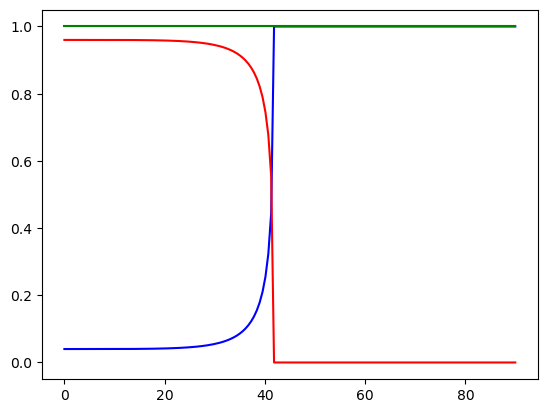

In [6]:
rrs = []
tts = []
rrp = []
ttp = []
for th in theta:
    R,T= myPhoton.fresnel_coefficients_average(1.5,1.0,th)
    
    rrs.append(R)
    tts.append(T)

    
    
    
rrs = np.array(rrs)
tts = np.array(tts)

plt.plot(theta*180/3.1415,rrs,'blue')

plt.plot(theta*180/3.1415,tts,'red')

plt.plot(theta*180/3.1415,tts+rrs,'green')


In [7]:
np.sin(0.85579)/np.sin(0.21744)

3.500148086920563

In [8]:
import numpy as np

def fresnel_coefficients(n1, n2, theta_i):
    cos_i = np.cos(theta_i)
    sin_i = np.sin(theta_i)
    n_ratio = n1 / n2
    sin_t = n_ratio * sin_i
    cos_t = np.sqrt(1.0 - sin_t**2)
    
    rs = (n1 * cos_i - n2 * cos_t) / (n1 * cos_i + n2 * cos_t)
    rp = (n2 * cos_i - n1 * cos_t) / (n2 * cos_i + n1 * cos_t)
    
    R = (np.abs(rs)**2 + np.abs(rp)**2) / 2.0
    T = 1.0 - R
    
    return R, T

# Example usage:
n1 = 1.0  # Refractive index of the incident medium
n2 = 1.5  # Refractive index of the refractive medium
theta_i = np.radians(30)  # Incident angle in radians (e.g., 30 degrees)

R, T = fresnel_coefficients(n1, n2, theta_i)

# Verify that R + T equals 1 for energy conservation
total_energy = R + T

print("Reflection Coefficient:", R)
print("Transmission Coefficient:", T)
print("Total Energy (R + T):", total_energy)


Reflection Coefficient: 0.04152262597582152
Transmission Coefficient: 0.9584773740241784
Total Energy (R + T): 1.0
